# Comparing Math Performance to National Average
Declan O'Neill

This report will compare a certain high school's performance on the math SAT to the national average of 513.

The data are held in [`sat_scores.csv`](./sat_scores.csv), telling the gender, verbal SAT score, and math SAT score for the students in this high school who took the SAT. To load it, we will use [pandas](https://pandas.pydata.org/), a python library built for working with and analyzing data.

In [1]:
import pandas as pd
sat_df = pd.read_csv("sat_scores.csv")
print(sat_df)

    gender  verbal  math
0        f     630   660
1        f     590   580
2        m     750   800
3        m     600   690
4        m     610   550
5        f     490   800
6        f     680   610
7        m     520   540
8        f     680   660
9        m     650   700
10       m     600   560
11       f     550   560
12       m     490   390
13       f     530   530
14       m     560   560
15       f     630   590
16       f     510   520
17       m     710   740
18       f     550   560
19       m     690   620
20       m     700   700
21       m     540   620
22       f     280   500
23       m     710   760
24       f     640   710
25       m     600   590
26       m     610   670
27       m     680   670
28       f     520   470
29       f     730   740
..     ...     ...   ...
273      f     570   530
274      f     560   540
275      f     670   520
276      m     650   710
277      f     690   700
278      m     610   740
279      f     500   650
280      m     560   700


We don't need the gender or verbal SAT score columns, so let's create a new dataframe that only has a math SAT score column.

In [2]:
math_sat_df = pd.DataFrame(sat_df["math"])
print(math_sat_df)

     math
0     660
1     580
2     800
3     690
4     550
5     800
6     610
7     540
8     660
9     700
10    560
11    560
12    390
13    530
14    560
15    590
16    520
17    740
18    560
19    620
20    700
21    620
22    500
23    760
24    710
25    590
26    670
27    670
28    470
29    740
..    ...
273   530
274   540
275   520
276   710
277   700
278   740
279   650
280   700
281   650
282   490
283   570
284   670
285   640
286   640
287   570
288   530
289   580
290   610
291   720
292   490
293   630
294   650
295   630
296   510
297   540
298   700
299   780
300   570
301   410
302   700

[303 rows x 1 columns]


Although these data come from a census, and population parameters can be calculated, we will take a random sample and run a test upon that to compare this high school's math performance to the national average. To generate a sample, we will use [`pandas.DataFrame.sample`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html). For the test that will be done later, it is important that size of the sample not exceed 10% of the size of the population. We will take a sample with a size 9% of the population.

In [3]:
math_sat_sample_df = math_sat_df.sample(frac=0.09)
print(math_sat_sample_df)

     math
128   630
274   540
188   710
136   470
280   700
78    660
270   640
281   650
160   520
273   530
277   700
272   630
202   540
94    570
162   570
99    550
265   570
230   530
154   570
268   700
51    530
302   700
125   670
43    560
17    740
38    580
256   640


Now that we have our sample, we need to calculate it's summary statistics. For this, we will use [numpy](http://www.numpy.org/), a python library designed for scientific computing.

In [4]:
import numpy as np

n                       = len(math_sat_sample_df)
degrees_of_freedom      = n-1
mean                    = float(np.mean(math_sat_sample_df))
standard_deviation      = float(np.std(math_sat_sample_df))
mean_standard_deviation = float(standard_deviation / np.sqrt(n))

print("n                       =", n)
print("degrees of freedom      =", degrees_of_freedom)
print("mean                    =", mean)
print("standard deviation      =", standard_deviation)
print("mean standard deviation =", mean_standard_deviation)

n                       = 27
degrees of freedom      = 26
mean                    = 607.4074074074074
standard deviation      = 71.88429966079455
mean standard deviation = 13.834139919889154


With these statistics calculated, we can run a **one-sample two-tail t-test** to compare this high school's math performance to the national average. Before we do, though, we have to check certain conditions.

### 1. Random sample of math SAT scores from this high school
We used [`pandas.DataFrame.sample`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html), which generates a pseudo-random sample. It may not be perfect, but it's random enough.

### 2. n is less than 10% of the total population of math SAT scores from this high school
We kept this in mind when generating the sample, using only 9% of the total population of math SAT scores from this high school. This condition checks out.

### 3. Sample comes from a distribution that is unimodal and symmetric
Let's generate a histogram of all the data. We'll use [matplotlib](https://matplotlib.org/), a python library for plotting data.

(array([  1.,   4.,  12.,  14.,  40.,  53.,  60.,  57.,  47.,  15.]),
 array([ 290.,  341.,  392.,  443.,  494.,  545.,  596.,  647.,  698.,
         749.,  800.]),
 <a list of 10 Patch objects>)

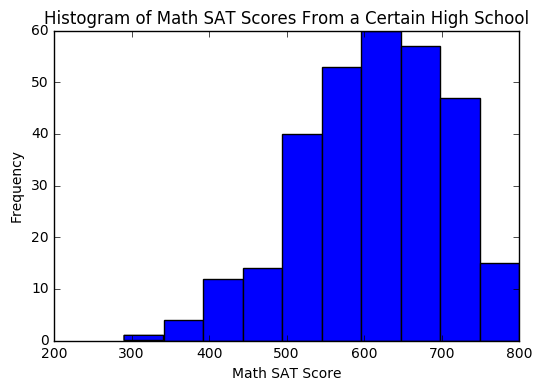

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.xlabel('Math SAT Score')
plt.ylabel('Frequency')
plt.title('Histogram of Math SAT Scores From a Certain High School')
plt.hist(sat_df["math"])

It could be said that the data are unimodal skewed left, but they will be *"normal enough"* to work with.

With these conditions met, we may run the **one-sample two-tail t-test**. Let's define the null and alternative hypotheses.

$$H_{0}: \mu = 513$$
$$H_{A}: \mu ≠ 513$$

The null hypothesis ($H_{0}$) states that the true mean of math SAT scores is equal to 513, the national average.

The alternative hypothesis ($H_{A}$) states that the true mean of math SAT scores is not equal to 513, the national average.

We can determine whether the null hypothesis should be accepted or not by calculating the t-statistic and its corresponding p-value.

$$t-statistic = t_{df} = \frac{\bar{X} - \mu_{0}}{SE(\bar{X})}$$

$df$ represents the degrees of freedom, $\bar{X}$ represents the mean of our sample, $\mu_{0}$ represents the national average, and $SE(\bar{X})$ represents the mean standard deviation of our sample.

In [6]:
t_stat = (mean - 513) / mean_standard_deviation
print("t-statistic =", t_stat)

t-statistic = 6.824233957015221


To find the p-value of a two-tailed t-test, we take the probability that any t-statistic from a student's t-distribution with the same degrees of freedom would be greater than or equal to this one, and then multiply it by two.

$$p-value = 2P(t_{26} ≥ t-statistic)$$

[scipy](https://www.scipy.org/) has a convenient function for calculating such probabilities: `scipy.stats.t.sf`

In [7]:
import scipy.stats

p_val = 2 * scipy.stats.t.sf(t_stat, degrees_of_freedom)
alpha = 0.05

if p_val < alpha:
    print("With a p-value of %s%%, this test rejects the null hypothesis in favor of the alternative" % (round(p_val*100,4)))
else:
    print("With a p-value of %s%%, this test fails to reject the null hypothesis" % (round(p_val*100,4)))

With a p-value of 0.0%, this test rejects the null hypothesis in favor of the alternative


The test has rejected that the true mean of math SAT scores is equal to 513, the national average. Now we should create a confidence interval to estimate what the true mean really is. We will use a 90% confidence interval. It is calculated with the following expression.

$$\bar{X} ± t^{*}_{df} * SE(\bar{X})$$

We can use `scipy.stats.t.isf` to determine $t^{*}_{26}$ based on our 90% confidence interval.

In [8]:
confidence = 0.9
upper_probability = (1 - confidence) / 2  # Parameter for isf
t_star = scipy.stats.t.isf(upper_probability, df=26)

print(t_star)

1.70561791976


We know the other values in the expression, so it is easy to calculate.

In [9]:
interval = [mean - (t_star * mean_standard_deviation), mean + (t_star * mean_standard_deviation)]
print(interval)

[583.81165045558737, 631.00316435922741]


It can be said with 90% confidence that the true mean value of math SAT scores for this particular high school lies on the above interval.